In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heights-and-weights-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F666227%2F1173983%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240517%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240517T102112Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9f85ee30adef8cece05522cf02878872b007f66280f031c2710254bcf32c8b26adc17817c290267f526774263d89ddcde0d87818214b4c077a2eaed10f2250cfae95c04faeb12edb5a67f9a5ae8857401d6d6943ece21dc88f9ecec98d9ee3fd976e873d985109cd756b061a3969fcf768fb97610777c458d6dce8e5eaff47cb9b07cd3124580fe1560db8304d71e499664f568f177c52001238ef8bf5c0ae1d5513ad0f11c8337e50f1afcd4e8cf4108ff14efcfa59e32d3f93c15dbb5341378986de15253d8000b8a7f0f2a931e6b9f54fddee6882152a542c50e2f31d28d718fef3e8bd317194354e9d8e710afd1bfd1fbee585d8df4cb501a193be2675e4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 250018 bytes downloaded
Downloaded and uncompressed: heights-and-weights-dataset
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'dataset.csv' with the filename or path to your dataset
data_1 = pd.read_csv("/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv")


In [6]:
# Display the first few rows of the dataset
print(data_1.head())


   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [12]:
# Limit the dataset to the first 250 rows
data_1_limited = data_1.head(250)

# Display the dataset after limiting to 250 rows
print("\nDataset size after limiting to 250 rows:", data_1_limited.shape)
print(data_1_limited.head())


Dataset size after limiting to 250 rows: (250, 3)
   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [14]:
# Display the last few rows of the dataset
print(data_1_limited.tail())

     Index  Height(Inches)  Weight(Pounds)
245    246        69.89473        115.6752
246    247        69.83048        134.7905
247    248        65.39790        120.5746
248    249        68.32214        120.0835
249    250        65.93895         84.3598


In [16]:
# Display information about the dataset
print(data_1_limited.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           250 non-null    int64  
 1   Height(Inches)  250 non-null    float64
 2   Weight(Pounds)  250 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.0 KB
None


In [17]:
# Display statistical summary of the dataset
print(data_1_limited.describe())


            Index  Height(Inches)  Weight(Pounds)
count  250.000000      250.000000      250.000000
mean   125.500000       67.992047      127.199087
std     72.312977        1.922800       12.164428
min      1.000000       63.425770       84.359800
25%     63.250000       66.586337      119.324050
50%    125.500000       67.991660      127.872700
75%    187.750000       69.329055      136.157100
max    250.000000       73.901070      158.956200


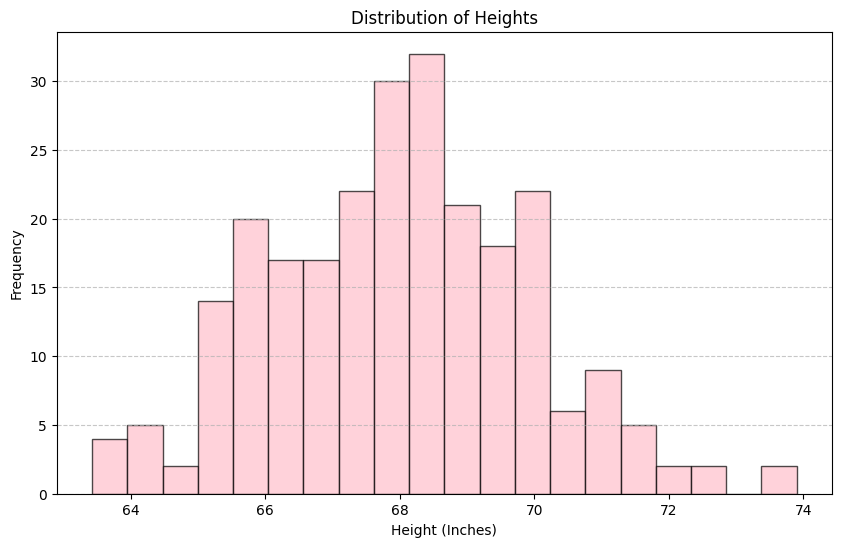

In [18]:
# Plot the histogram to visualize the distribution of Heights
plt.figure(figsize=(10, 6))
plt.hist(data_1_limited['Height(Inches)'], bins=20, color='pink', edgecolor='black', alpha=0.7)
plt.title('Distribution of Heights')
plt.xlabel('Height (Inches)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

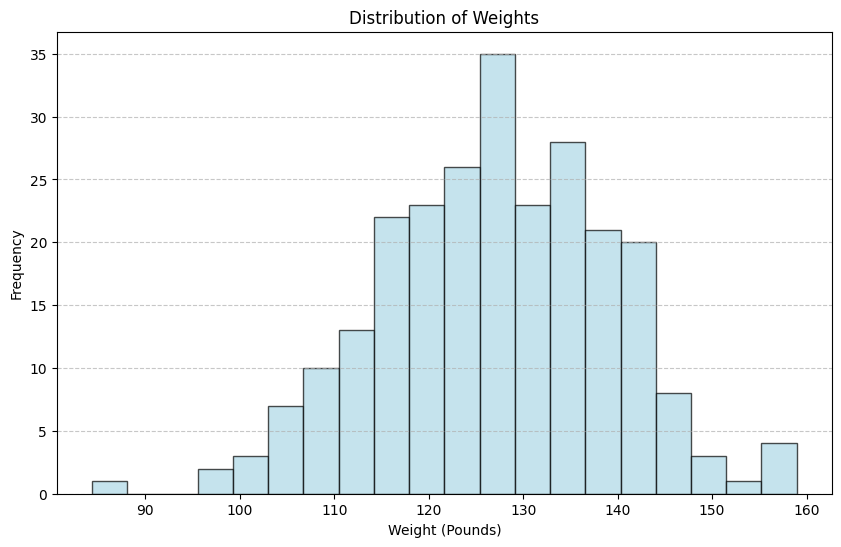

In [19]:
# Plot the histogram to visualize the distribution of Weights
plt.figure(figsize=(10, 6))
plt.hist(data_1_limited['Weight(Pounds)'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Weights')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()